In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# Business Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Capstone - Repsol/Capstone_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Product,Latitude,Longitude,RetailPrice,Sales Standard,Name,Month,Year,...,MaxPressure,MinPressure,Gust,Sun,MaxTemp,AvgTemp,MinTemp,AvgSpeed,Address,Type_y
0,0,2016-01-01,95,43.31749,-8.479238,1.169,0.050747,ES4,January,2016,...,1012.5,998.3,19.4,1.8,15.3,12.4,9.4,5.8,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña",road
1,1,2016-01-01,GOA,43.31749,-8.479238,1.009,0.186170,ES4,January,2016,...,1012.5,998.3,19.4,1.8,15.3,12.4,9.4,5.8,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña",road
2,2,2016-01-02,95,43.31749,-8.479238,1.169,0.173696,ES4,January,2016,...,1014.3,1006.2,13.6,5.7,14.0,11.2,8.4,4.2,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña",road
3,3,2016-01-02,GOA,43.31749,-8.479238,1.009,0.459796,ES4,January,2016,...,1014.3,1006.2,13.6,5.7,14.0,11.2,8.4,4.2,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña",road
4,4,2016-01-03,95,43.31749,-8.479238,1.169,0.132367,ES4,January,2016,...,1006.2,996.9,19.2,0.0,15.6,14.0,12.3,5.8,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña",road


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'Product', 'Latitude', 'Longitude', 'RetailPrice',
       'Sales Standard', 'Name', 'Month', 'Year', 'Weekday', 'Holiday_y',
       'Type_x', 'WindDirection', 'TimeMaxPressure', 'TimeMinPressure',
       'TimeGust', 'TimeMaxTemp', 'TimeMinTemp', 'Precipitation',
       'MaxPressure', 'MinPressure', 'Gust', 'Sun', 'MaxTemp', 'AvgTemp',
       'MinTemp', 'AvgSpeed', 'Address', 'Type_y'],
      dtype='object')

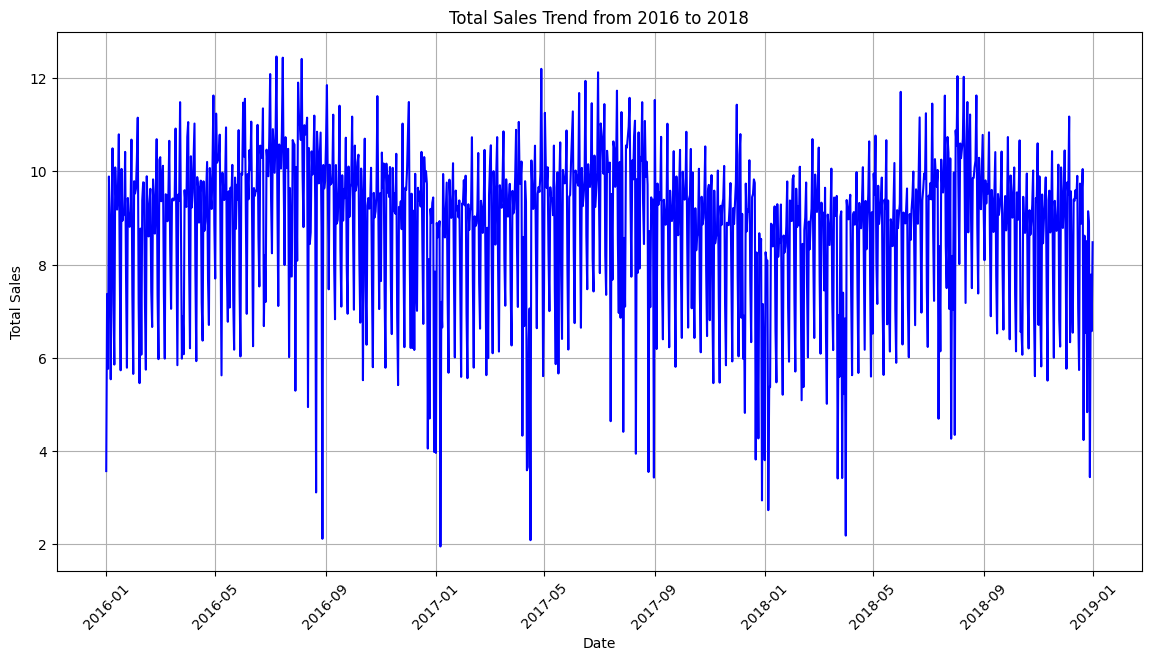

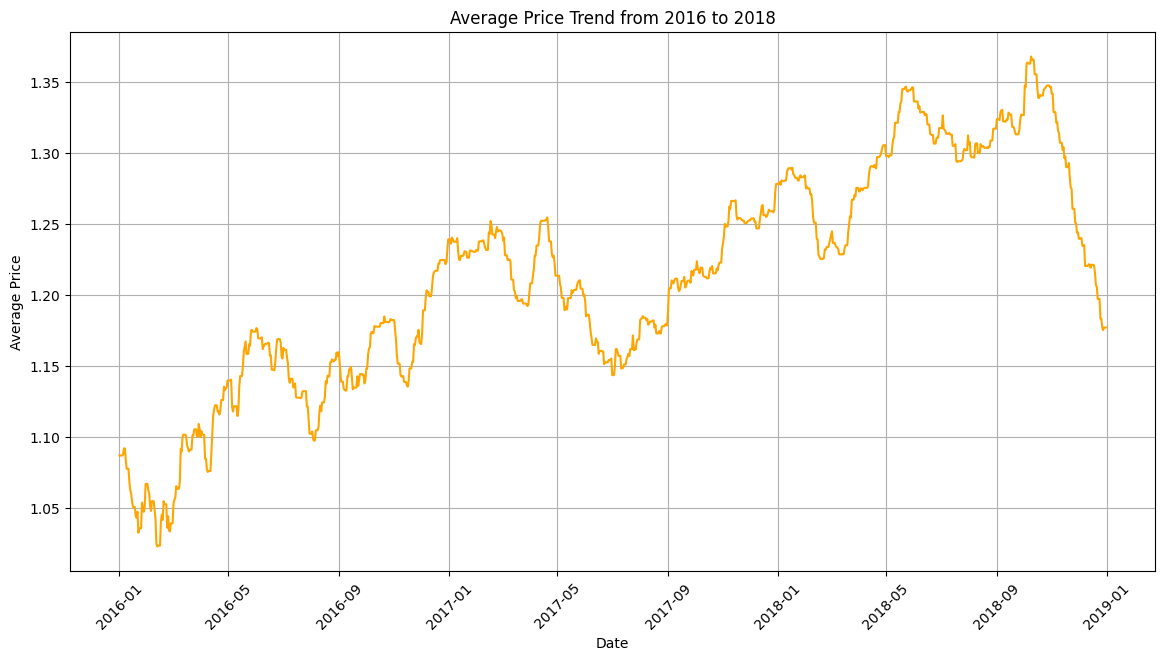

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_separate_time_series(df):
    # Filter data for years 2016 to 2018
    df_filtered = df[(df['Year'] >= 2016) & (df['Year'] <= 2018)]

    # Ensure 'Date' column is in datetime format
    df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

    # Group by date and calculate total sales and average prices
    daily_data = df_filtered.groupby('Date').agg({'Sales Standard': 'sum', 'RetailPrice': 'mean'}).reset_index()

    # Plot total sales
    plt.figure(figsize=(14, 7))
    plt.plot(daily_data['Date'], daily_data['Sales Standard'], color='blue', label='Total Sales')
    plt.title('Total Sales Trend from 2016 to 2018')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

    # Plot average price
    plt.figure(figsize=(14, 7))
    plt.plot(daily_data['Date'], daily_data['RetailPrice'], color='orange', label='Average Price')
    plt.title('Average Price Trend from 2016 to 2018')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Example usage
plot_separate_time_series(df)

In [6]:
def max_min_sales(df):
    total_sales = df.groupby('Address')['Sales Standard'].sum()
    max_sales_station = total_sales.idxmax()
    min_sales_station = total_sales.idxmin()
    max_sales = total_sales.max()
    min_sales = total_sales.min()

    result = {
        'Max Sales Station': max_sales_station,
        'Max Sales': max_sales,
        'Min Sales Station': min_sales_station,
        'Min Sales': min_sales
    }

    return result


sales_summary = max_min_sales(df)
print(sales_summary)

{'Max Sales Station': 'CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Coruña', 'Max Sales': 1025.3679867302794, 'Min Sales Station': 'CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña', 'Min Sales': 505.693211456}


<ipython-input-8-bf203a05aa99>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_sales, x='Address', y='Sales Standard', palette='viridis')


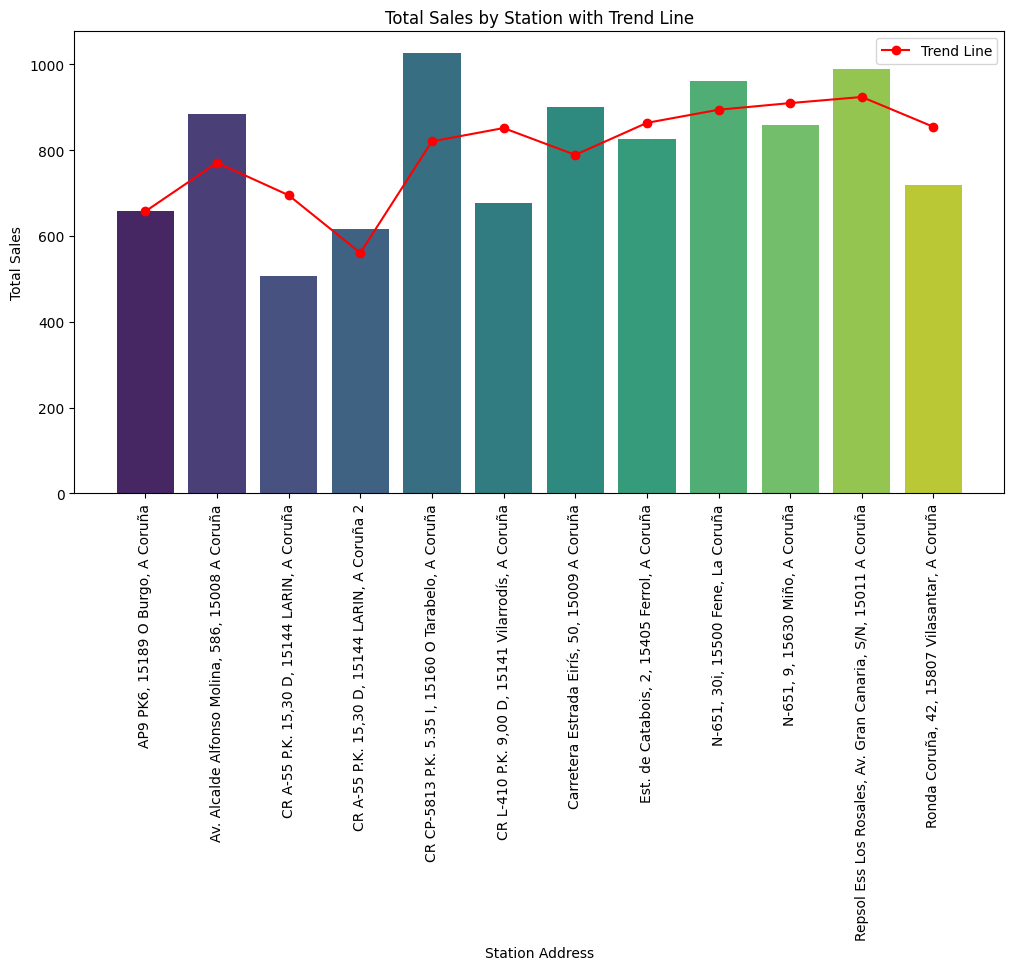

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_total_sales_with_trend(df):
    total_sales = df.groupby('Address')['Sales Standard'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=total_sales, x='Address', y='Sales Standard', palette='viridis')

    # Add a trend line
    trend = total_sales['Sales Standard'].rolling(window=2, min_periods=1).mean()
    plt.plot(total_sales.index, trend, color='red', marker='o', label='Trend Line')

    plt.xticks(rotation=90)
    plt.title('Total Sales by Station with Trend Line')
    plt.ylabel('Total Sales')
    plt.xlabel('Station Address')
    plt.legend()
    plt.show()

# Call the function with your dataframe
plot_total_sales_with_trend(df)

## Sales Analysis

### By product and Station

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['Sales'] = pd.to_numeric(df['Sales Standard'], errors='coerce')


# Group by product type and location, then sum the sales
sales_by_product_location = df.groupby(['Product', 'Address']).agg({'Sales Standard': 'sum'}).reset_index()

# Display the cleaned data and missing values
print(df.isnull().sum())

Unnamed: 0         0
Date               0
Product            0
Latitude           0
Longitude          0
RetailPrice        0
Sales Standard     0
Name               0
Month              0
Year               0
Weekday            0
Holiday_y          0
Type_x             0
WindDirection      0
TimeMaxPressure    0
TimeMinPressure    0
TimeGust           0
TimeMaxTemp        0
TimeMinTemp        0
Precipitation      0
MaxPressure        0
MinPressure        0
Gust               0
Sun                0
MaxTemp            0
AvgTemp            0
MinTemp            0
AvgSpeed           0
Address            0
Type_y             0
Sales              0
dtype: int64


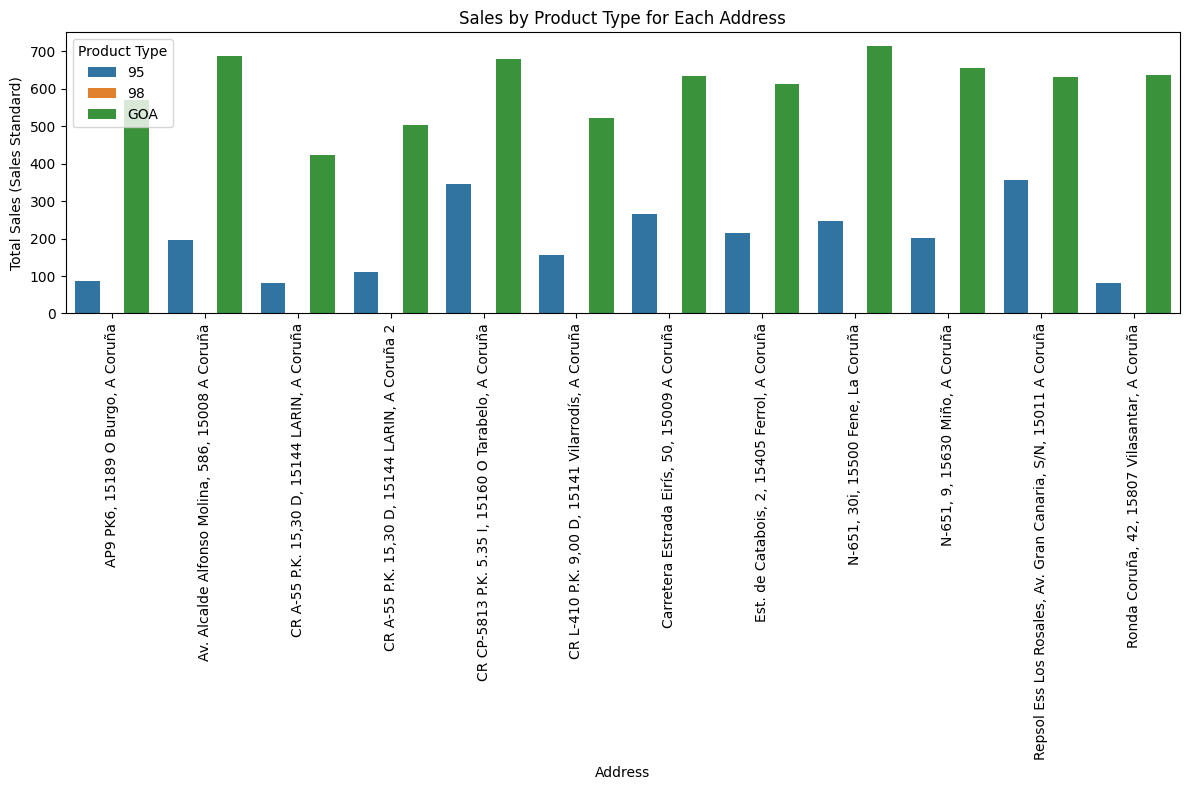

In [10]:
# Plotting the sales by product type for each location
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_by_product_location, x='Address', y='Sales Standard', hue='Product')
plt.xticks(rotation=90)
plt.title('Sales by Product Type for Each Address')
plt.xlabel('Address')
plt.ylabel('Total Sales (Sales Standard)')
plt.legend(title='Product Type')
plt.tight_layout()
plt.show()

Since we cannot see any entries of 98, lets see how many entries we have, if they are less than 5, we will remove them.

In [11]:
def check_and_remove_product(df, product_code):
    # Count the number of entries for the specified product
    product_count = df[df['Product'] == product_code].shape[0]

    print(f"Number of entries for Product {product_code}: {product_count}")

    # Remove entries if the count is less than 5
    if product_count < 5:
        df = df[df['Product'] != product_code]
        print(f"Product {product_code} removed from the dataset due to low count.")

    return df

# Update the dataset for Product 98
df = check_and_remove_product(df, '98')

Number of entries for Product 98: 2
Product 98 removed from the dataset due to low count.


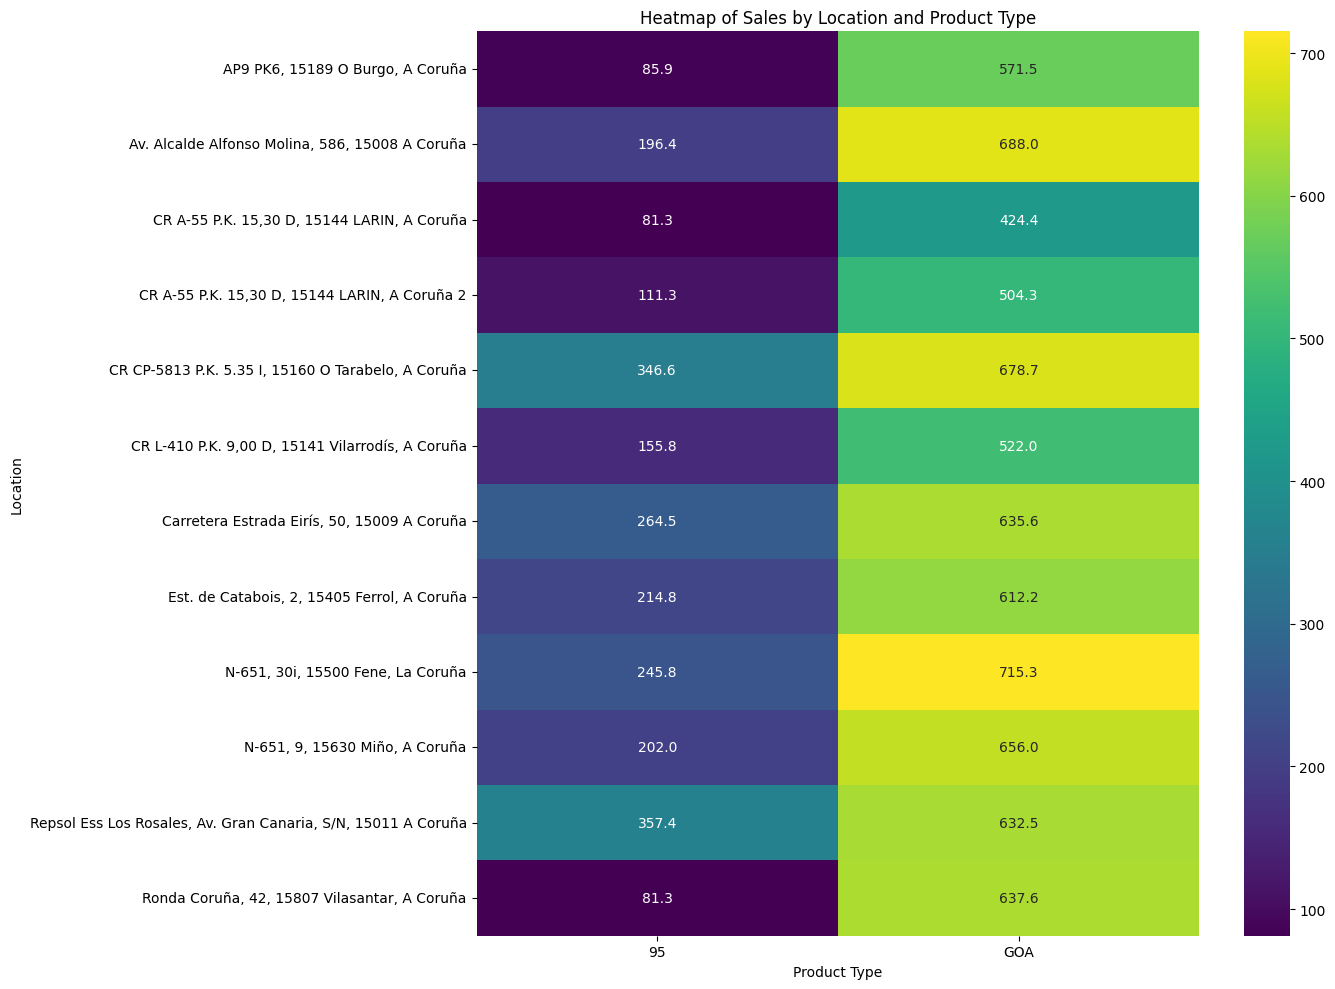

In [12]:
# Group by product type and location, then sum the sales
sales_by_product_location = df.groupby(['Product', 'Address']).agg({'Sales Standard': 'sum'}).reset_index()

# Pivot the data for heatmap visualization
sales_pivot = sales_by_product_location.pivot(index='Address', columns='Product', values='Sales Standard')

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(sales_pivot, annot=True, fmt=".1f", cmap='viridis')
plt.title('Heatmap of Sales by Location and Product Type')
plt.xlabel('Product Type')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


In [13]:
def calculate_sales_per_station(df):
    # Group by Address, Year, and Product, then sum the Sales
    sales_per_station = df.groupby(['Address', 'Year', 'Product'])['Sales'].sum().reset_index()

    # Pivot the data to have years as outer columns and products as inner columns
    sales_pivot = sales_per_station.pivot(index='Address', columns=['Year', 'Product'], values='Sales').fillna(0)

    return sales_pivot

sales_by_year = calculate_sales_per_station(df)
sales_by_year

Year                                                      2016              \
Product                                                     95         GOA   
Address                                                                      
AP9 PK6, 15189 O Burgo, A Coruña                     26.553568  184.034585   
Av. Alcalde Alfonso Molina, 586, 15008 A Coruña      69.718065  240.893730   
CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña          22.682902  120.517619   
CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña 2        33.629028  154.940253   
CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Coruña  115.718734  230.443312   
CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña     54.048894  184.658216   
Carretera Estrada Eirís, 50, 15009 A Coruña          92.394014  230.426939   
Est. de Catabois, 2, 15405 Ferrol, A Coruña          76.969981  228.655380   
N-651, 30i, 15500 Fene, La Coruña                    78.820176  245.184289   
N-651, 9, 15630 Miño, A Coruña                       68.092929  234.243126   
Repsol Ess Los Rosales, Av. Gran Canaria, S/N, ...  121.886675  225.505629   
Ronda Coruña, 42, 15807 Vilasantar, A Coruña         32.467049  235.905296   

Year                                                      2017              \
Product                                                     95         GOA   
Address                                                                      
AP9 PK6, 15189 O Burgo, A Coruña                     27.948075  191.983321   
Av. Alcalde Alfonso Molina, 586, 15008 A Coruña      63.688521  229.626312   
CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña          27.851154  151.379135   
CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña 2        37.475793  169.856535   
CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Coruña  112.440596  225.530974   
CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña     50.544741  172.430027   
Carretera Estrada Eirís, 50, 15009 A Coruña          88.661237  207.888828   
Est. de Catabois, 2, 15405 Ferrol, A Coruña          69.161197  198.371718   
N-651, 30i, 15500 Fene, La Coruña                    79.034654  240.576610   
N-651, 9, 15630 Miño, A Coruña                       66.503485  214.802974   
Repsol Ess Los Rosales, Av. Gran Canaria, S/N, ...  117.972728  208.625864   
Ronda Coruña, 42, 15807 Vilasantar, A Coruña         26.681531  212.673233   

Year                                                      2018              
Product                                                     95         GOA  
Address                                                                     
AP9 PK6, 15189 O Burgo, A Coruña                     31.417240  195.455976  
Av. Alcalde Alfonso Molina, 586, 15008 A Coruña      62.964207  217.462144  
CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña          30.766899  152.495503  
CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña 2        40.188633  179.503095  
CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Coruña  118.474280  222.760091  
CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña     51.181349  164.924220  
Carretera Estrada Eirís, 50, 15009 A Coruña          83.414644  197.293706  
Est. de Catabois, 2, 15405 Ferrol, A Coruña          68.647265  185.162236  
N-651, 30i, 15500 Fene, La Coruña                    87.967018  229.557094  
N-651, 9, 15630 Miño, A Coruña                       67.452050  206.937436  
Repsol Ess Los Rosales, Av. Gran Canaria, S/N, ...  117.506397  198.397118  
Ronda Coruña, 42, 15807 Vilasantar, A Coruña         22.123119  189.022797

## Potential Clients for each Station in 2018

In [14]:
from geopy.distance import geodesic

In [16]:
population = pd.read_csv("/content/drive/MyDrive/Capstone - Repsol/Clean_Demography_Output.csv")
population.head()

,Zipcode,Municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,15001.0,Abegondo,5822.0,5798.0,5765.0,5709.0,5709.0,5664.0,5585.0,5586.0,5533.0,5467.0,5454.0
1,15002.0,Ames,25818.0,26983.0,27900.0,28852.0,29331.0,29689.0,29975.0,30267.0,30544.0,30835.0,31278.0
2,15003.0,Aranga,2181.0,2142.0,2126.0,2113.0,2072.0,2051.0,2033.0,1997.0,1982.0,1935.0,1894.0
3,15004.0,Ares,5682.0,5673.0,5705.0,5801.0,5839.0,5801.0,5741.0,5743.0,5672.0,5658.0,5671.0
4,15005.0,Arteixo,28961.0,29762.0,30255.0,30482.0,30725.0,31005.0,30857.0,30950.0,31239.0,31534.0,31917.0


### Add the coordinates for the municipalities

In [17]:
additional_coordinates = {
    'Abegondo': (43.2500, -8.3167),
    'Ames': (42.8667, -8.6167),
    'Aranga': (43.2167, -8.0333),
    'Ares': (43.4167, -8.2167),
    'Arteixo': (43.3047, -8.5073),
    'Arzúa': (42.9333, -8.1833),
    'Baña, A': (42.9167, -8.8333),
    'Bergondo': (43.3167, -8.2667),
    'Betanzos': (43.2833, -8.2167),
    'Boimorto': (43.0167, -8.1000),
    'Boiro': (42.6500, -8.8833),
    'Boqueixón': (42.7833, -8.4667),
    'Brión': (42.8833, -8.6833),
    'Cabana de Bergantiños': (43.2167, -8.8833),
    'Cabanas': (43.4000, -8.2000),
    'Camariñas': (43.1319, -9.1819),
    'Cambre': (43.2833, -8.3667),
    'Capela, A': (43.3833, -8.1167),
    'Carballo': (43.2131, -8.6911),
    'Cariño': (43.7333, -7.8667),
    'Carnota': (42.8167, -9.0833),
    'Carral': (43.2500, -8.3667),
    'Cedeira': (43.6600, -8.0583),
    'Cee': (42.9500, -9.1900),
    'Cerceda': (43.1833, -8.5167),
    'Cerdido': (43.6333, -7.9333),
    'Cesuras': (43.1833, -8.2167),
    'Coirós': (43.2667, -8.1833),
    'Corcubión': (42.9500, -9.2000),
    'Coristanco': (43.1833, -8.7167),
    'Coruña, A': (43.3700, -8.3950),
    'Culleredo': (43.2833, -8.3833),
    'Curtis': (43.2167, -8.0833),
    'Dodro': (42.7333, -8.7167),
    'Dumbría': (42.9056, -9.1375),
    'Fene': (43.4667, -8.1500),
    'Ferrol': (43.4833, -8.2333),
    'Fisterra': (42.9167, -9.2667),
    'Frades': (43.0000, -8.3000),
    'Irixoa': (43.2833, -8.0667),
    'Laracha, A': (43.2333, -8.6333),
    'Laxe': (43.2167, -9.0000),
    'Lousame': (42.8167, -8.8667),
    'Malpica de Bergantiños': (43.3167, -8.8167),
    'Mañón': (43.7333, -7.7333),
    'Mazaricos': (42.9167, -8.9333),
    'Melide': (42.9167, -8.0167),
    'Mesía': (43.0667, -8.2500),
    'Miño': (43.3513, -8.2010),
    'Moeche': (43.5667, -7.9833),
    'Monfero': (43.3667, -8.0333),
    'Mugardos': (43.4500, -8.2667),
    'Muros': (42.7764, -9.0603),
    'Muxía': (43.1097, -9.2175),
    'Narón': (43.5167, -8.1500),
    'Neda': (43.5000, -8.1500),
    'Negreira': (42.9128, -8.6989),
    'Noia': (42.7833, -8.8833),
    'Oleiros': (43.3333, -8.3333),
    'Ordes': (43.1167, -8.4000),
    'Oroso': (42.9833, -8.4333),
    'Ortigueira': (43.6833, -7.8667),
    'Outes': (42.8833, -9.0167),
    'Oza dos Ríos': (43.2500, -8.1667),
    'Oza-Cesuras': (43.2500, -8.1667),
    'Paderne': (43.3000, -8.1667),
    'Padrón': (42.7333, -8.6500),
    'Pino, O': (42.9000, -8.3833),
    'Pobra do Caramiñal, A': (42.6000, -8.9333),
    'Ponteceso': (43.2525, -8.9275),
    'Pontedeume': (43.4000, -8.1700),
    'Pontes de García Rodríguez, As': (43.4500, -7.8500),
    'Porto do Son': (42.7333, -9.0000),
    'Rianxo': (42.6500, -8.8167),
    'Ribeira': (42.5500, -8.9833),
    'Rois': (42.7500, -8.6833),
    'San Sadurniño': (43.5167, -8.0333),
    'Santa Comba': (43.0500, -8.8167),
    'Santiago de Compostela': (42.8805, -8.5457),
    'Santiso': (42.8333, -8.0167),
    'Sobrado': (43.0667, -8.0500),
    'Somozas, As': (43.5000, -8.0167),
    'Teo': (42.8000, -8.5667),
    'Toques': (43.0000, -8.0333),
    'Tordoia': (43.0500, -8.6000),
    'Touro': (42.8333, -8.3000),
    'Trazo': (43.0000, -8.6000),
    'Val do Dubra': (43.0333, -8.6000),
    'Valdoviño': (43.6131, -8.1597),
    'Vedra': (42.8000, -8.4500),
    'Vilarmaior': (43.3500, -8.1333),
    'Vilasantar': (43.0500, -8.0833),
    'Vimianzo': (43.1064, -9.0142),
    'Zas': (43.1072, -9.0208)
}


### Set a 15km radius to look for nearby municipalities

In [19]:
import pandas as pd
from geopy.distance import geodesic

def find_near_municipalities(stations, municipalities, radius_km=15):
    near_municipalities = {}

    for idx, station in stations.iterrows():
        station_coord = (station['Latitud'], station['Longitud'])
        nearby = []

        for name, coord in municipalities.items():
            if geodesic(station_coord, coord).km <= radius_km:
                nearby.append(name)

        near_municipalities[station['Address']] = nearby

    return near_municipalities

# Example usage
stations = pd.read_csv("/content/drive/MyDrive/Capstone - Repsol/Locations.csv")
near_municipalities = find_near_municipalities(stations, additional_coordinates)

def display_near_municipalities(near_municipalities):
    # Convert the dictionary to a DataFrame
    result_df = pd.DataFrame(list(near_municipalities.items()), columns=['Station Address', 'Nearby Municipalities'])
    result_df['Nearby Municipalities'] = result_df['Nearby Municipalities'].apply(lambda x: ', '.join(x))
    result_df['Municipality Count'] = result_df['Nearby Municipalities'].apply(lambda x: len(x.split(', ')))
    return result_df

# Display the DataFrame
result_df = display_near_municipalities(near_municipalities)
result_df.head()

,Station Address,Nearby Municipalities,Municipality Count
0,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña","Arteixo, Cambre, Carral, Coruña, A, Culleredo,...",7
1,"Est. de Catabois, 2, 15405 Ferrol, A Coruña","Ares, Cabanas, Fene, Ferrol, Mugardos, Narón, ...",9
2,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...","Abegondo, Ares, Bergondo, Betanzos, Cabanas, C...",21
3,"Ronda Coruña, 42, 15807 Vilasantar, A Coruña","Aranga, Boimorto, Cesuras, Curtis, Mesía, Sobr...",7
4,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña","Abegondo, Arteixo, Bergondo, Cambre, Carral, C...",9


In [20]:
# pip install pygeodesic

### Count the potential clients for each station

In [22]:
def calculate_potential_clients(result_df, population_df):
    # Create a dictionary to map municipalities to their 2018 population
    population_map = population_df.set_index('Municipality')['2018'].to_dict()

    # Calculate potential clients for each station
    result_df['Potential Clients'] = result_df['Nearby Municipalities'].apply(
        lambda x: sum(population_map.get(municipality, 0) for municipality in x.split(', '))
    )

    return result_df


result_df = calculate_potential_clients(result_df, population)

# Display the DataFrame with potential clients
result_df[['Station Address', 'Potential Clients']]

,Station Address,Potential Clients
0,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña",128594.0
1,"Est. de Catabois, 2, 15405 Ferrol, A Coruña",107104.0
2,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",662979.0
3,"Ronda Coruña, 42, 15807 Vilasantar, A Coruña",12998.0
4,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña",140650.0
5,"AP9 PK6, 15189 O Burgo, A Coruña",153566.0
6,"N-651, 9, 15630 Miño, A Coruña",642772.0
7,"N-651, 30i, 15500 Fene, La Coruña",108335.0
8,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",129319.0
9,"Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",135196.0


In [ ]:
#! pip install folium

### Interactive Map

In [23]:
import folium
from folium.plugins import MarkerCluster

def create_interactive_map(stations_df, result_df):
    # Initialize the map centered on A Coruña
    m = folium.Map(location=[43.3623, -8.4115], zoom_start=10)

    # Create a marker cluster
    marker_cluster = MarkerCluster().add_to(m)

    # Merge station coordinates with potential clients data
    merged_df = pd.merge(stations_df, result_df, left_on='Address', right_on='Station Address')

    # Add stations to the map
    for _, row in merged_df.iterrows():
        popup_text = (f"Station: {row['Address']}<br>"
                      f"Potential Clients: {row['Potential Clients']}")
        folium.Marker(
            location=[row['Latitud'], row['Longitud']],
            popup=popup_text,
        ).add_to(marker_cluster)

    return m

# Create the map
interactive_map = create_interactive_map(stations, result_df)
interactive_map


### Potential clients for each station in 2018

In [24]:
# Sort the DataFrame by Potential Clients
result_df_sorted = result_df.sort_values(by='Potential Clients', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
result_df_sorted

,Station Address,Nearby Municipalities,Municipality Count,Potential Clients
0,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...","Abegondo, Ares, Bergondo, Betanzos, Cabanas, C...",21,662979.0
1,"N-651, 9, 15630 Miño, A Coruña","Abegondo, Ares, Bergondo, Betanzos, Cabanas, C...",20,642772.0
2,"AP9 PK6, 15189 O Burgo, A Coruña","Abegondo, Arteixo, Bergondo, Betanzos, Cambre,...",11,153566.0
3,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña","Abegondo, Arteixo, Bergondo, Cambre, Carral, C...",9,140650.0
4,"Carretera Estrada Eirís, 50, 15009 A Coruña","Abegondo, Arteixo, Bergondo, Cambre, Carral, C...",9,140650.0
5,"Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...","Arteixo, Bergondo, Cambre, Carral, Coruña, A, ...",8,135196.0
6,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña","Arteixo, Cambre, Carballo, Carral, Cerceda, Cu...",8,129319.0
7,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña 2","Arteixo, Cambre, Carballo, Carral, Cerceda, Cu...",8,129319.0
8,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña","Arteixo, Cambre, Carral, Coruña, A, Culleredo,...",7,128594.0
9,"N-651, 30i, 15500 Fene, La Coruña","Ares, Cabanas, Capela, A, Fene, Ferrol, Miño, ...",15,108335.0


In [25]:
def sales_summary_2018(df):
    # Filter for 2018 data
    sales_2018 = df[df['Year'] == 2018]

    # Group by Address and Product, then sum the Sales
    summary = sales_2018.groupby(['Address', 'Product'])['Sales'].sum().unstack().fillna(0)
    summary['Total Sales'] = summary.sum(axis=1)

    # Sort by total sales
    summary_sorted = summary.sort_values(by='Total Sales', ascending=False).reset_index()

    return summary_sorted


sales_summary = sales_summary_2018(df)

def merge_sales_with_station_type(sales_summary, stations):
    # Merge the sales summary with station type information
    merged_df = sales_summary.merge(stations[['Address', 'Type']], on='Address', how='left')
    return merged_df

# Example usage
sales_summary = merge_sales_with_station_type(sales_summary, stations)
sales_summary

,Address,95,GOA,Total Sales,Type
0,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",118.474280,222.760091,341.234371,road
1,"N-651, 30i, 15500 Fene, La Coruña",87.967018,229.557094,317.524112,road
2,"Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",117.506397,198.397118,315.903514,road
3,"Carretera Estrada Eirís, 50, 15009 A Coruña",83.414644,197.293706,280.708350,city
4,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña",62.964207,217.462144,280.426351,road
5,"N-651, 9, 15630 Miño, A Coruña",67.452050,206.937436,274.389486,road
6,"Est. de Catabois, 2, 15405 Ferrol, A Coruña",68.647265,185.162236,253.809501,city
7,"AP9 PK6, 15189 O Burgo, A Coruña",31.417240,195.455976,226.873217,road
8,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña 2",40.188633,179.503095,219.691729,road
9,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña",51.181349,164.924220,216.105569,road


In [26]:
import pandas as pd

def merge_sales_with_clients(sales_summary, potential_clients):
    # Merge the sales summary with potential clients information
    merged_df = sales_summary.merge(
        potential_clients[['Station Address', 'Potential Clients']],
        left_on='Address',
        right_on='Station Address',
        how='left'
    ).drop(columns=['Station Address'])
    return merged_df

# Example usage
merged_summary_with_clients = merge_sales_with_clients(sales_summary, result_df)
merged_summary_with_clients

,Address,95,GOA,Total Sales,Type,Potential Clients
0,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",118.474280,222.760091,341.234371,road,662979.0
1,"N-651, 30i, 15500 Fene, La Coruña",87.967018,229.557094,317.524112,road,108335.0
2,"Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",117.506397,198.397118,315.903514,road,135196.0
3,"Carretera Estrada Eirís, 50, 15009 A Coruña",83.414644,197.293706,280.708350,city,140650.0
4,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña",62.964207,217.462144,280.426351,road,140650.0
5,"N-651, 9, 15630 Miño, A Coruña",67.452050,206.937436,274.389486,road,642772.0
6,"Est. de Catabois, 2, 15405 Ferrol, A Coruña",68.647265,185.162236,253.809501,city,107104.0
7,"AP9 PK6, 15189 O Burgo, A Coruña",31.417240,195.455976,226.873217,road,153566.0
8,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña 2",40.188633,179.503095,219.691729,road,129319.0
9,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña",51.181349,164.924220,216.105569,road,128594.0


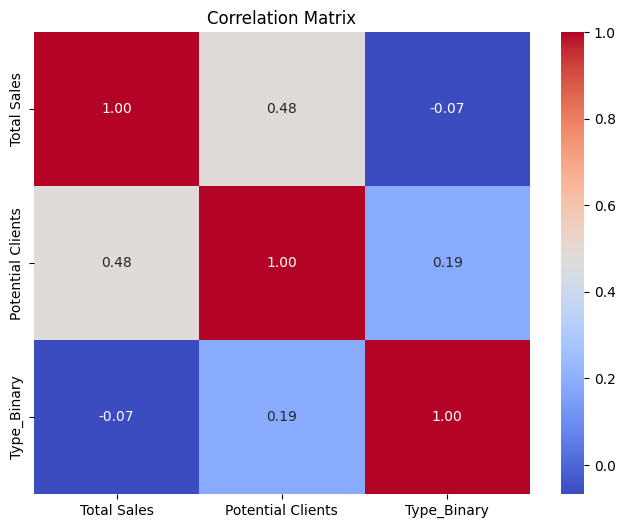

Correlation between Total Sales and Potential Clients: 0.4801821404453226
Correlation between Total Sales and Type (Binary): -0.06753252467514895


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_correlations(df):
    # Convert Type to binary: road = 1, city = 0
    df['Type_Binary'] = df['Type'].apply(lambda x: 1 if x == 'road' else 0)

    # Calculate correlation matrix
    correlation_matrix = df[['Total Sales', 'Potential Clients', 'Type_Binary']].corr()

    # Plot the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Display correlations
    print("Correlation between Total Sales and Potential Clients:", correlation_matrix.loc['Total Sales', 'Potential Clients'])
    print("Correlation between Total Sales and Type (Binary):", correlation_matrix.loc['Total Sales', 'Type_Binary'])

# Example usage
analyze_correlations(merged_summary_with_clients)


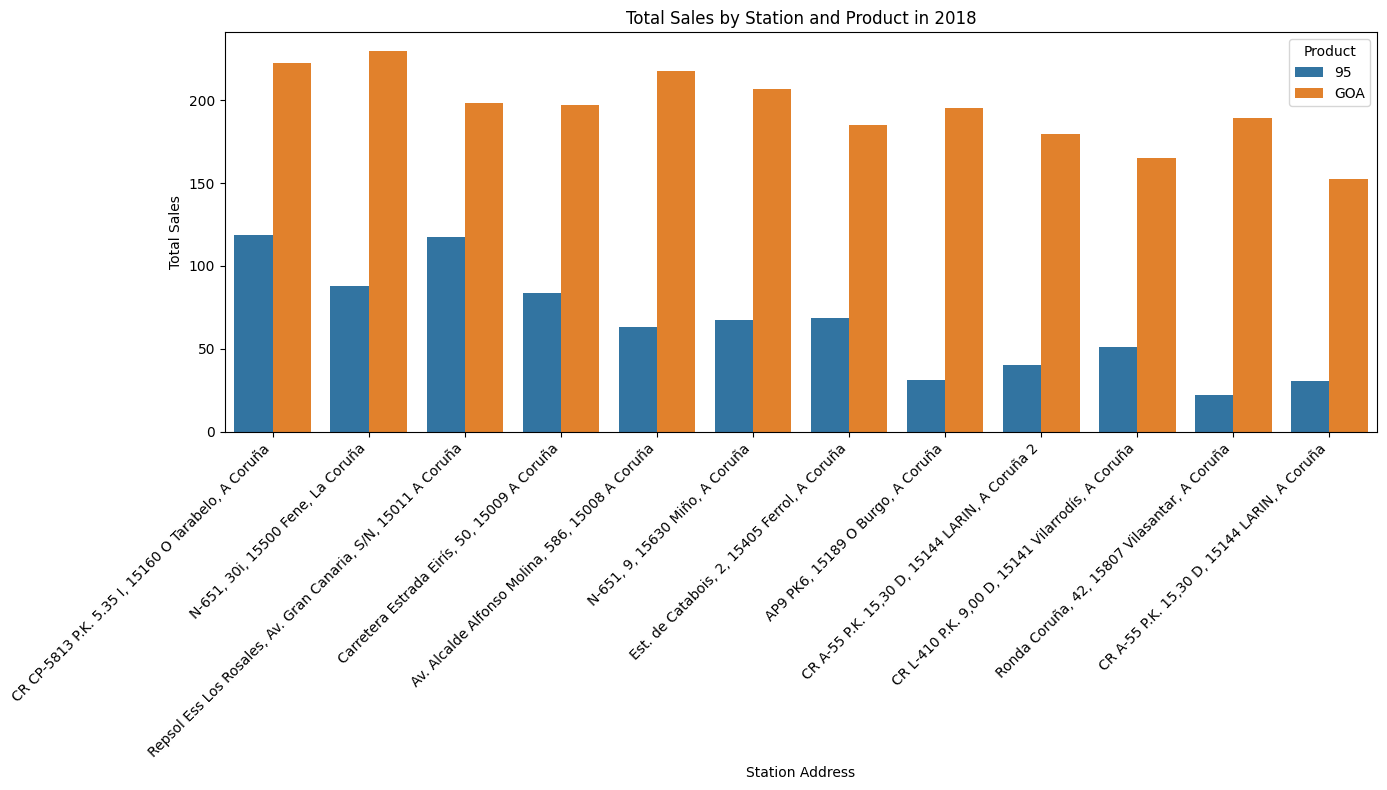

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_sales_summary(sales_summary):
    # Melt the DataFrame to long format for easier plotting
    sales_melted = sales_summary.melt(id_vars='Address', value_vars=['95', 'GOA'],
                                      var_name='Product', value_name='Sales')

    # Plot the sales data
    plt.figure(figsize=(14, 8))
    sns.barplot(data=sales_melted, x='Address', y='Sales', hue='Product')

    plt.title('Total Sales by Station and Product in 2018')
    plt.xlabel('Station Address')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Product')
    plt.tight_layout()
    plt.show()

# Visualize the sales summary
visualize_sales_summary(sales_summary)


### Price by product in 2018

In [29]:
def price_summary_2018(df):
    # Filter for 2018 data
    price_2018 = df[df['Year'] == 2018]

    # Group by Address and Product, then calculate the average price4
    summary = price_2018.groupby(['Address', 'Product'])['RetailPrice'].mean().unstack().fillna(0)

    # Sort by average price of Product 95
    summary_sorted = summary.sort_values(by='95', ascending=False).reset_index()

    return summary_sorted


price_summary = price_summary_2018(df)
price_summary


Product,Address,95,GOA
0,"Est. de Catabois, 2, 15405 Ferrol, A Coruña",1.337696,1.263537
1,"Carretera Estrada Eirís, 50, 15009 A Coruña",1.335187,1.261110
2,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña",1.335142,1.261110
3,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",1.335033,1.254830
4,"N-651, 30i, 15500 Fene, La Coruña",1.333544,1.259044
5,"N-651, 9, 15630 Miño, A Coruña",1.333367,1.260496
6,"Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",1.328255,1.250715
7,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña",1.326463,1.256129
8,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",1.322518,1.248912
9,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña 2",1.322518,1.248912


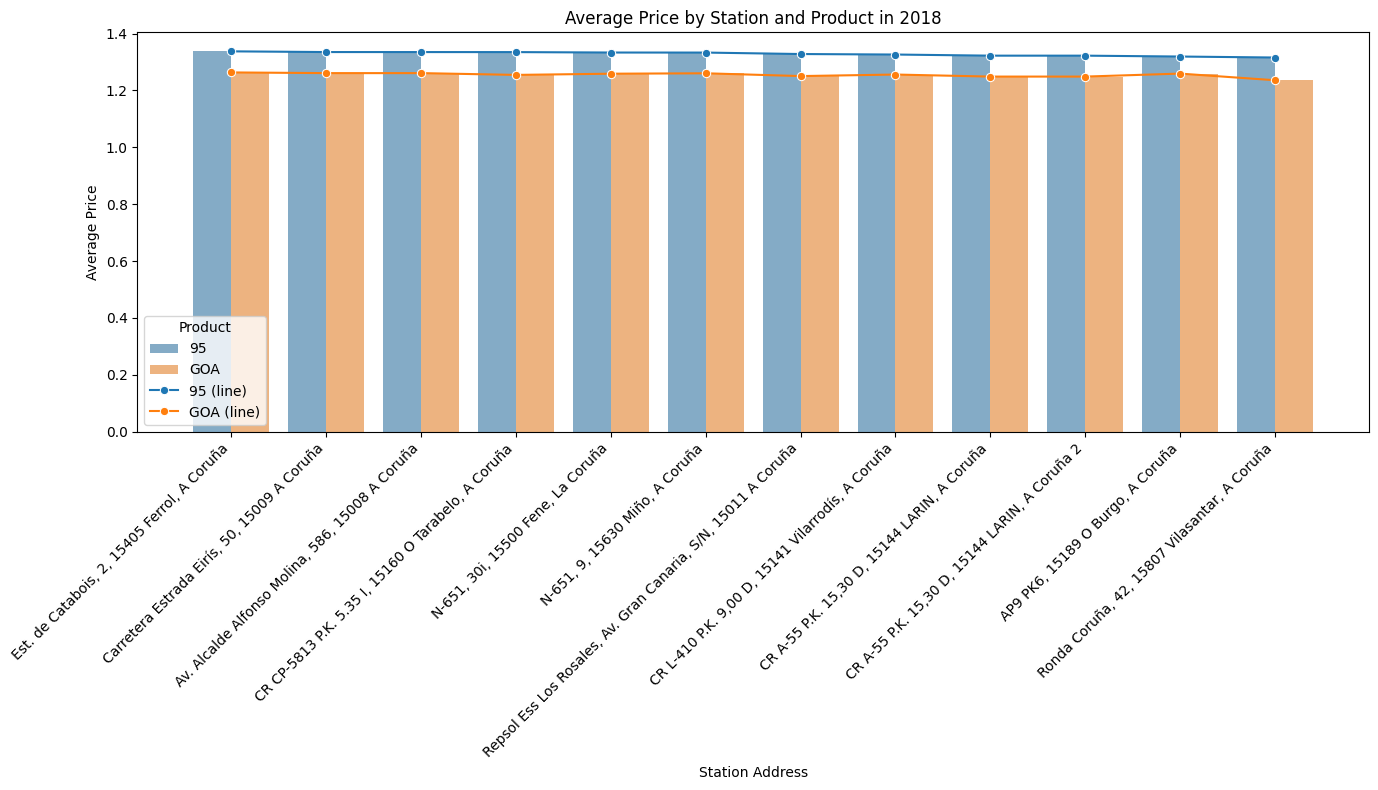

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_price_summary_with_lines(price_summary):
    # Melt the DataFrame for easier plotting
    price_melted = price_summary.melt(id_vars='Address', var_name='Product', value_name='Average Price')

    # Plot using Seaborn
    plt.figure(figsize=(14, 8))
    sns.barplot(data=price_melted, x='Address', y='Average Price', hue='Product', alpha=0.6)

    # Add a line plot for each product to see price trends
    for product in price_melted['Product'].unique():
        product_data = price_melted[price_melted['Product'] == product]
        sns.lineplot(data=product_data, x='Address', y='Average Price', marker='o', label=f'{product} (line)', legend=False)

    plt.title('Average Price by Station and Product in 2018')
    plt.xlabel('Station Address')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Product')
    plt.tight_layout()
    plt.show()

# Visualize the price summary with lines
visualize_price_summary_with_lines(price_summary)


# Customer behavior analysis

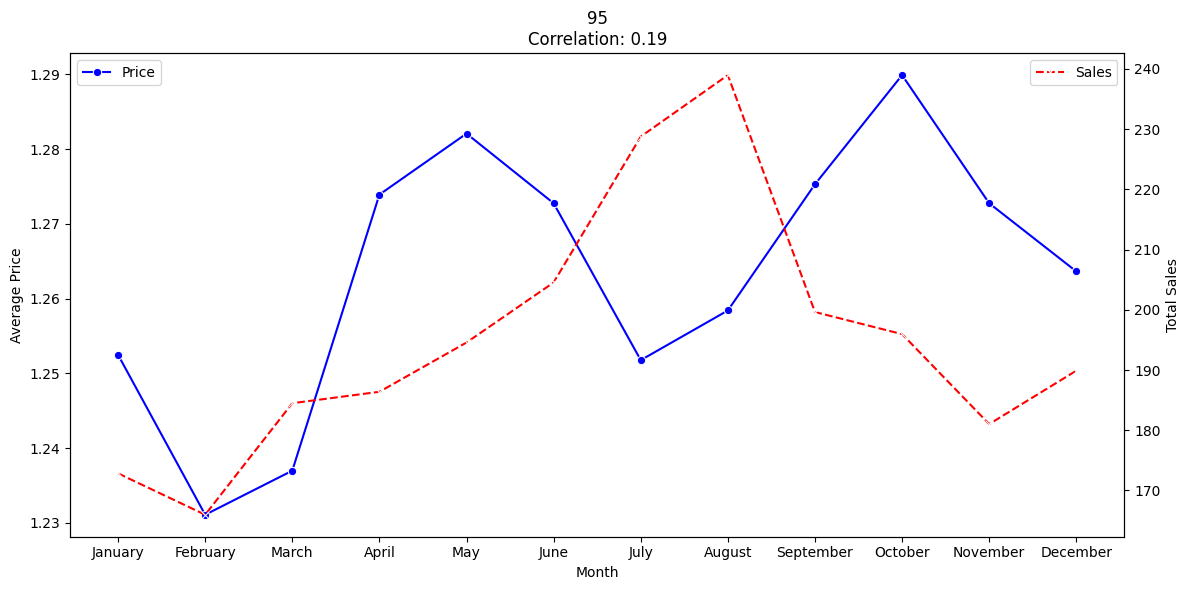

Price sensitivity is weak or unclear for 95 across all stations (Correlation: 0.19).


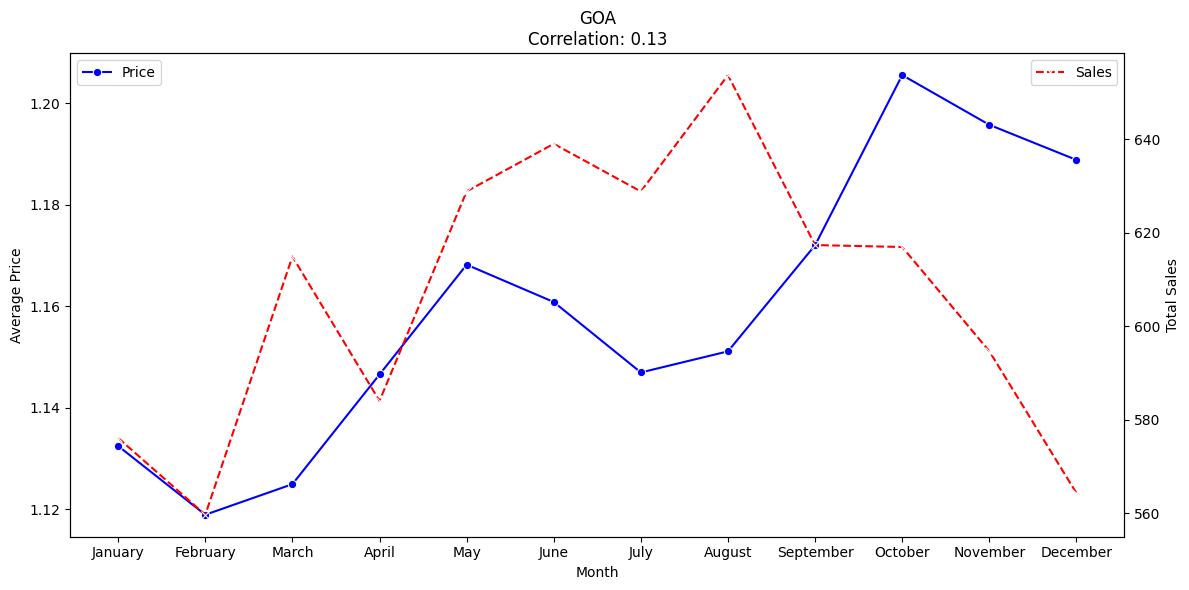

Price sensitivity is weak or unclear for GOA across all stations (Correlation: 0.13).


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_price_sensitivity_by_product(df):
    # Define the correct month order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']

    products = df['Product'].unique()

    for product in products:
        # Filter for specific product
        filtered_df = df[df['Product'] == product]

        # Group by month
        monthly_data = filtered_df.groupby('Month').agg({'Sales': 'sum', 'RetailPrice': 'mean'}).reindex(month_order).reset_index()

        # Calculate correlation
        correlation = monthly_data['Sales'].corr(monthly_data['RetailPrice'])

        # Plot sales and price
        fig, ax1 = plt.subplots(figsize=(12, 6))

        sns.lineplot(data=monthly_data, x='Month', y='RetailPrice', marker='o', ax=ax1, color='blue', label='Price')
        ax1.set_ylabel('Average Price')
        ax1.set_title(f'{product}\nCorrelation: {correlation:.2f}')
        ax1.legend(loc='upper left')

        ax2 = ax1.twinx()
        sns.lineplot(data=monthly_data, x='Month', y='Sales', marker='x', ax=ax2, color='red', linestyle='--', label='Sales')
        ax2.set_ylabel('Total Sales')
        ax2.legend(loc='upper right')

        fig.tight_layout()
        plt.show()

        # Determine price sensitivity
        if correlation > 0.5:
            print(f"There is strong positive price sensitivity for {product} across all stations (Correlation: {correlation:.2f}).")
        elif correlation < -0.5:
            print(f"There is strong negative price sensitivity for {product} across all stations (Correlation: {correlation:.2f}).")
        else:
            print(f"Price sensitivity is weak or unclear for {product} across all stations (Correlation: {correlation:.2f}).")

# Example usage
analyze_price_sensitivity_by_product(df)


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_sales_price_correlation_all(df):
    # Define the correct month order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']

    # Iterate over each station and product
    stations = df['Address'].unique()
    products = df['Product'].unique()

    for station in stations:
        for product in products:
            # Filter for specific station and product
            filtered_df = df[(df['Address'] == station) & (df['Product'] == product)]
            if filtered_df.empty:
                continue

            # Group by month
            monthly_data = filtered_df.groupby('Month').agg({'Sales': 'sum', 'RetailPrice': 'mean'}).reindex(month_order).reset_index()

            # Calculate correlation
            correlation = monthly_data['Sales'].corr(monthly_data['RetailPrice'])

            # Plot sales and price
            fig, ax1 = plt.subplots(figsize=(12, 6))

            sns.lineplot(data=monthly_data, x='Month', y='RetailPrice', marker='o', ax=ax1, color='blue', label='Price')
            ax1.set_ylabel('Average Price')
            ax1.set_title(f'{station} - {product}\nCorrelation: {correlation:.2f}')
            ax1.legend(loc='upper left')

            ax2 = ax1.twinx()
            sns.lineplot(data=monthly_data, x='Month', y='Sales', marker='x', ax=ax2, color='red', linestyle='--', label='Sales')
            ax2.set_ylabel('Total Sales')
            ax2.legend(loc='upper right')

            fig.tight_layout()
            plt.show()

            # Determine price sensitivity
            if correlation > 0.5:
                print(f"There is strong positive price sensitivity for {product} at {station} (Correlation: {correlation:.2f}).")
            elif correlation < -0.5:
                print(f"There is strong negative price sensitivity for {product} at {station} (Correlation: {correlation:.2f}).")
            else:
                print(f"Price sensitivity is weak or unclear for {product} at {station} (Correlation: {correlation:.2f}).")

# Example usage
plot_sales_price_correlation_all(df)



Output hidden; open in https://colab.research.google.com to view.

### How do nearby Stations affect each other?

#### 1. Pair nearby stations

In [33]:
from geopy.distance import geodesic

def find_nearby_stations(stations, radius_km=15):
    nearby_pairs = []
    for idx1, station1 in stations.iterrows():
        for idx2, station2 in stations.iterrows():
            if idx1 >= idx2:
                continue
            distance = geodesic((station1['Latitude'], station1['Longitude']),
                                (station2['Latitude'], station2['Longitude'])).km
            if distance <= radius_km:
                nearby_pairs.append((station1['Address'], station2['Address']))
    return nearby_pairs

#### 2. Do nearby stations have the same sales patterns?

In [34]:
import pandas as pd

def compare_sales_patterns(df, nearby_pairs):
    patterns = []

    for station1, station2 in nearby_pairs:
        for product in df['Product'].unique():
            sales1 = df[
                (df['Address'] == station1) &
                (df['Product'] == product)
            ].groupby('Month')['Sales'].sum()

            sales2 = df[
                (df['Address'] == station2) &
                (df['Product'] == product)
            ].groupby('Month')['Sales'].sum()

            if not sales1.empty and not sales2.empty:
                total_sales1 = sales1.sum()
                total_sales2 = sales2.sum()
                if total_sales1 != 0:
                    difference = ((total_sales1 - total_sales2) / total_sales1) * 100

                    if abs(difference) > 50:
                        patterns.append({
                            'Station 1': station1,
                            'Station 2': station2,
                            'Product': product,
                            'Total Sales Station 1': total_sales1,
                            'Total Sales Station 2': total_sales2,
                            'Percentage Difference': difference
                        })

    return pd.DataFrame(patterns)



In [35]:
stations = df[['Address', 'Latitude', 'Longitude']].drop_duplicates()
nearby_pairs = find_nearby_stations(stations)
sales_patterns = compare_sales_patterns(df, nearby_pairs)

In [36]:
sales_patterns

,Station 1,Station 2,Product,Total Sales Station 1,Total Sales Station 2,Percentage Difference
0,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña","Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",95,155.774984,357.365799,-129.411546
1,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña","Carretera Estrada Eirís, 50, 15009 A Coruña",95,155.774984,264.469895,-69.776872
2,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...","AP9 PK6, 15189 O Burgo, A Coruña",95,346.633609,85.918883,75.213343
3,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña","AP9 PK6, 15189 O Burgo, A Coruña",95,196.370792,85.918883,56.246608
4,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña","CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",95,196.370792,81.300955,58.598245
5,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña","Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",95,196.370792,357.365799,-81.985210
6,"AP9 PK6, 15189 O Burgo, A Coruña","N-651, 9, 15630 Miño, A Coruña",95,85.918883,202.048464,-135.161884
7,"AP9 PK6, 15189 O Burgo, A Coruña","Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",95,85.918883,357.365799,-315.933944
8,"AP9 PK6, 15189 O Burgo, A Coruña","Carretera Estrada Eirís, 50, 15009 A Coruña",95,85.918883,264.469895,-207.813470
9,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña","Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",95,81.300955,357.365799,-339.559167


In [37]:
def analyze_potential_clients(sales_patterns, result_df):
    client_patterns = []

    for index, row in sales_patterns.iterrows():
        station1 = row['Station 1']
        station2 = row['Station 2']

        clients1 = result_df[result_df['Station Address'] == station1]['Potential Clients'].sum()
        clients2 = result_df[result_df['Station Address'] == station2]['Potential Clients'].sum()

        if clients1 != 0:
            client_difference = ((clients1 - clients2) / clients1) * 100

            client_patterns.append({
                'Station 1': station1,
                'Station 2': station2,
                'Clients Station 1': clients1,
                'Clients Station 2': clients2,
                'Client Percentage Difference': client_difference
            })

    return pd.DataFrame(client_patterns)


client_patterns = analyze_potential_clients(sales_patterns, result_df)



In [38]:
def analyze_price_differences(df, sales_patterns):
    price_patterns = []

    for index, row in sales_patterns.iterrows():
        station1 = row['Station 1']
        station2 = row['Station 2']
        product = row['Product']

        price1 = df[(df['Address'] == station1) &
                    (df['Product'] == product)]['RetailPrice'].mean()

        price2 = df[(df['Address'] == station2) &
                    (df['Product'] == product)]['RetailPrice'].mean()

        if price1 != 0:
            price_difference = ((price1 - price2) / price1) * 100

            price_patterns.append({
                'Station 1': station1,
                'Station 2': station2,
                'Product': product,
                'Price Station 1': price1,
                'Price Station 2': price2,
                'Price Percentage Difference': price_difference
            })

    return pd.DataFrame(price_patterns)


price_patterns = analyze_price_differences(df, sales_patterns)



In [39]:
def combined_analysis(sales_patterns, client_patterns, price_patterns):
    combined_df = sales_patterns.merge(client_patterns, on=['Station 1', 'Station 2'])
    combined_df = combined_df.merge(price_patterns, on=['Station 1', 'Station 2', 'Product'])
    return combined_df

combined_df = combined_analysis(sales_patterns, client_patterns, price_patterns)


In [40]:
combined_df

,Station 1,Station 2,Product,Total Sales Station 1,Total Sales Station 2,Percentage Difference,Clients Station 1,Clients Station 2,Client Percentage Difference,Price Station 1,Price Station 2,Price Percentage Difference
0,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña","Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",95,155.774984,357.365799,-129.411546,128594.0,135196.0,-5.133988,1.263190,1.263734,-0.043095
1,"CR L-410 P.K. 9,00 D, 15141 Vilarrodís, A Coruña","Carretera Estrada Eirís, 50, 15009 A Coruña",95,155.774984,264.469895,-69.776872,128594.0,140650.0,-9.375243,1.263190,1.265116,-0.152460
2,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...","AP9 PK6, 15189 O Burgo, A Coruña",95,346.633609,85.918883,75.213343,662979.0,153566.0,76.836974,1.267002,1.265977,0.080871
3,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña","AP9 PK6, 15189 O Burgo, A Coruña",95,196.370792,85.918883,56.246608,140650.0,153566.0,-9.183079,1.265372,1.265977,-0.047806
4,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña","CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",95,196.370792,81.300955,58.598245,140650.0,129319.0,8.056168,1.265372,1.261608,0.297464
5,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña","Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",95,196.370792,357.365799,-81.985210,140650.0,135196.0,3.877711,1.265372,1.263734,0.129457
6,"AP9 PK6, 15189 O Burgo, A Coruña","N-651, 9, 15630 Miño, A Coruña",95,85.918883,202.048464,-135.161884,153566.0,642772.0,-318.564005,1.265977,1.264562,0.111783
7,"AP9 PK6, 15189 O Burgo, A Coruña","Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",95,85.918883,357.365799,-315.933944,153566.0,135196.0,11.962283,1.265977,1.263734,0.177179
8,"AP9 PK6, 15189 O Burgo, A Coruña","Carretera Estrada Eirís, 50, 15009 A Coruña",95,85.918883,264.469895,-207.813470,153566.0,140650.0,8.410716,1.265977,1.265116,0.068054
9,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña","Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",95,81.300955,357.365799,-339.559167,129319.0,135196.0,-4.544576,1.261608,1.263734,-0.168508


In [41]:
import pandas as pd

def interpret_factors(combined_df):
    # Calculate correlations
    sales_client_corr = combined_df['Percentage Difference'].corr(combined_df['Client Percentage Difference'])
    sales_price_corr = combined_df['Percentage Difference'].corr(combined_df['Price Percentage Difference'])

    # Interpretation
    interpretation = {
        'Sales and Client Correlation': sales_client_corr,
        'Sales and Price Correlation': sales_price_corr
    }

    return interpretation


interpretation = interpret_factors(combined_df)
interpretation


{'Sales and Client Correlation': 0.10997815443849641,
 'Sales and Price Correlation': 0.34516106174131644}

### Holiday and Weekday Impact

In [42]:
df.columns

Index(['Unnamed: 0', 'Date', 'Product', 'Latitude', 'Longitude', 'RetailPrice',
       'Sales Standard', 'Name', 'Month', 'Year', 'Weekday', 'Holiday_y',
       'Type_x', 'WindDirection', 'TimeMaxPressure', 'TimeMinPressure',
       'TimeGust', 'TimeMaxTemp', 'TimeMinTemp', 'Precipitation',
       'MaxPressure', 'MinPressure', 'Gust', 'Sun', 'MaxTemp', 'AvgTemp',
       'MinTemp', 'AvgSpeed', 'Address', 'Type_y', 'Sales'],
      dtype='object')

In [43]:
# Ensure the 'Holiday' column is properly formatted (assuming 'Holiday' column exists)
df['Holiday'] = df['Holiday_y'].apply(lambda x: True if x != 'no' else False)

<ipython-input-44-73a48ed23317>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_sales, x='Holiday', y='Sales', palette='viridis')


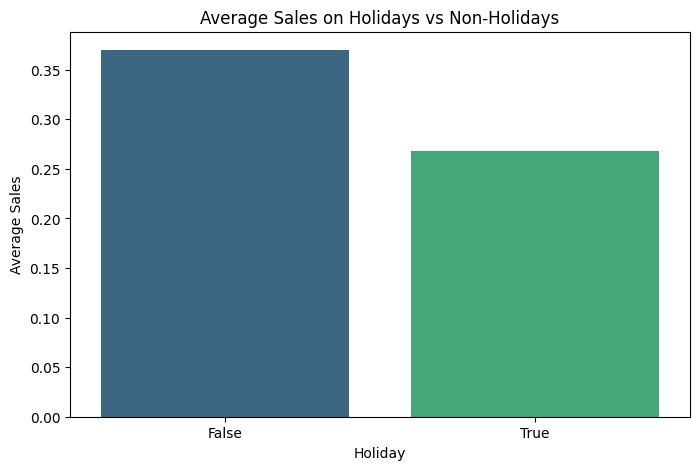

,Holiday,Sales
0,False,0.369789
1,True,0.268039


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_holiday_impact(df):

    # Group by Holiday and calculate average sales
    holiday_sales = df.groupby('Holiday')['Sales'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(8, 5))
    sns.barplot(data=holiday_sales, x='Holiday', y='Sales', palette='viridis')
    plt.title('Average Sales on Holidays vs Non-Holidays')
    plt.xlabel('Holiday')
    plt.ylabel('Average Sales')
    plt.show()

    # Display the DataFrame
    return holiday_sales

# Example usage
holiday_impact = analyze_holiday_impact(df)
holiday_impact


<ipython-input-45-9d2227d2bdea>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_sales, x='Weekday', y='Sales', palette='coolwarm', order=weekday_order)


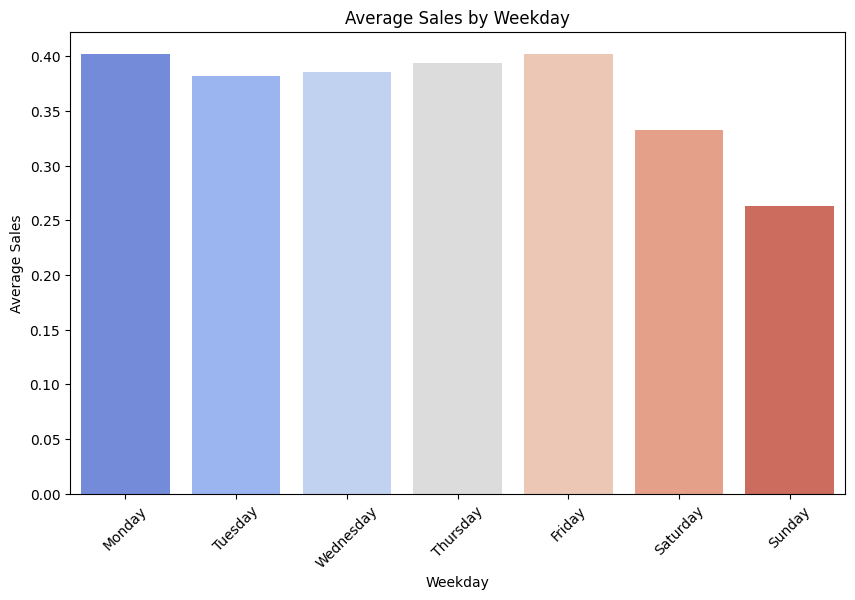

,Weekday,Sales
1,Monday,0.402172
5,Tuesday,0.382301
6,Wednesday,0.385549
4,Thursday,0.393432
0,Friday,0.401738
2,Saturday,0.332529
3,Sunday,0.263278


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_weekday_impact(df):
    # Group by Weekday and calculate average sales
    weekday_sales = df.groupby('Weekday')['Sales'].mean().reset_index()

    # Define the order of weekdays
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_sales['Weekday'] = pd.Categorical(weekday_sales['Weekday'], categories=weekday_order, ordered=True)
    weekday_sales = weekday_sales.sort_values('Weekday')

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(data=weekday_sales, x='Weekday', y='Sales', palette='coolwarm', order=weekday_order)
    plt.title('Average Sales by Weekday')
    plt.xlabel('Weekday')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=45)
    plt.show()

    # Display the DataFrame
    return weekday_sales

# Example usage
weekday_impact = analyze_weekday_impact(df)
weekday_impact


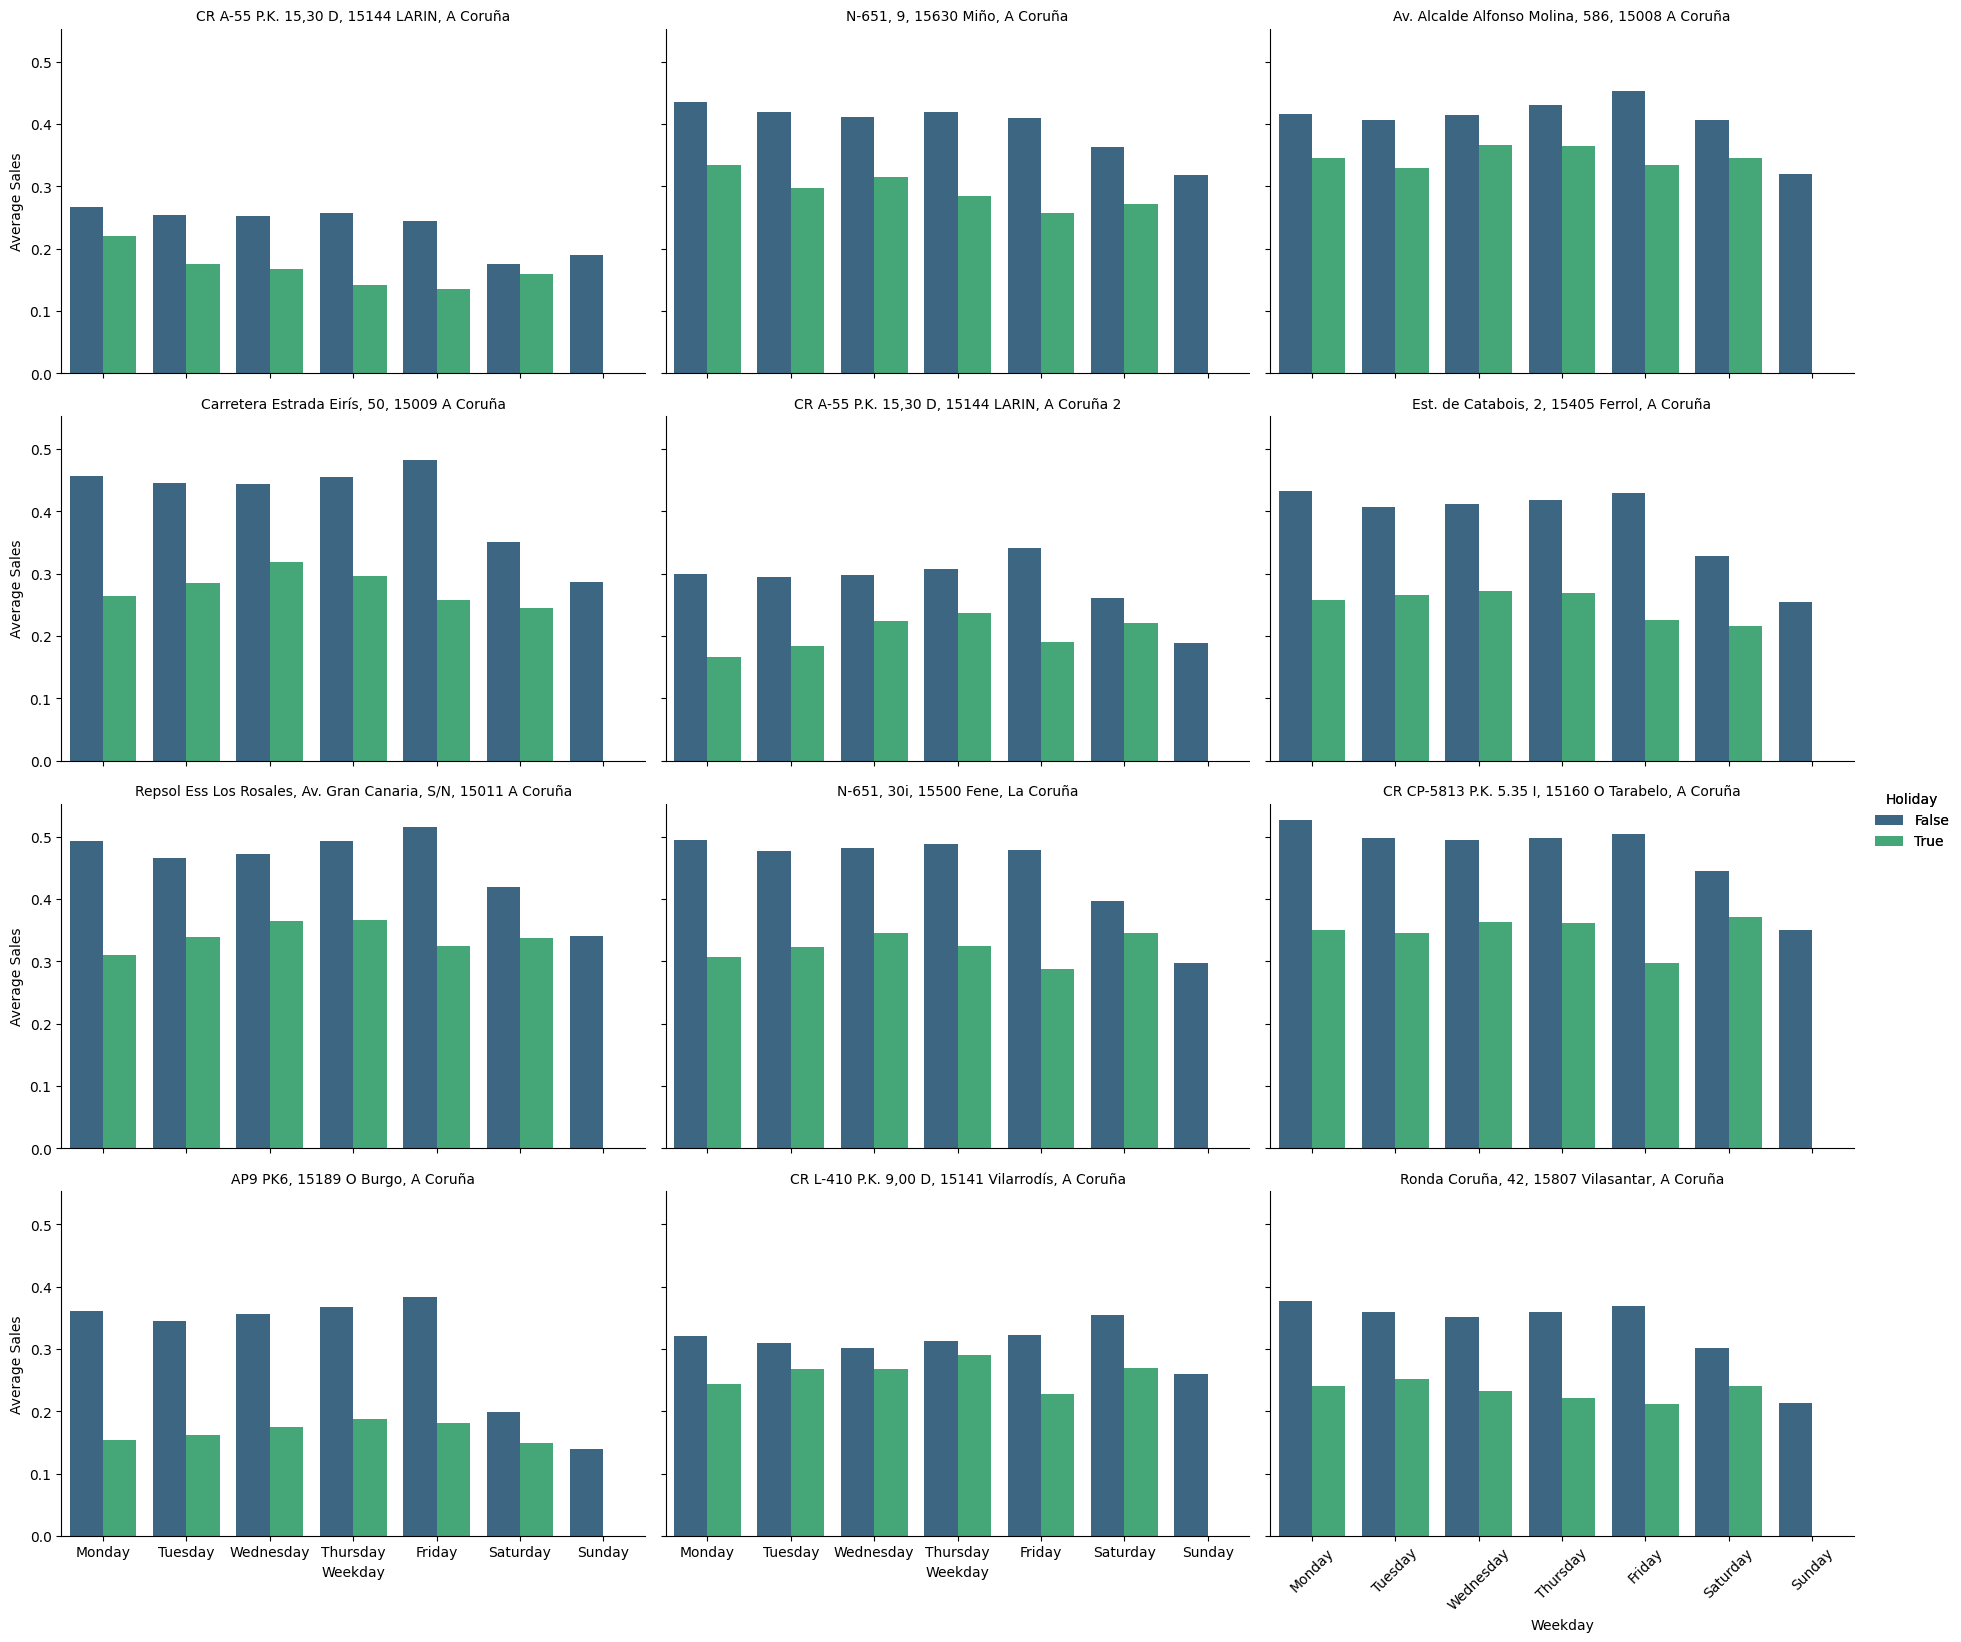

,Address,Holiday,Weekday,Sales
34,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",True,Monday,0.220007
118,"N-651, 9, 15630 Miño, A Coruña",False,Monday,0.434350
27,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",False,Monday,0.266400
21,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña",True,Monday,0.345098
86,"Carretera Estrada Eirís, 50, 15009 A Coruña",True,Monday,0.264379


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_holiday_weekday_impact_by_station(df):
    # Define the order of weekdays
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Group by Station, Holiday, and Weekday
    holiday_weekday_sales = df.groupby(['Address', 'Holiday', 'Weekday'])['Sales'].mean().reset_index()

    # Set Weekday as an ordered categorical
    holiday_weekday_sales['Weekday'] = pd.Categorical(holiday_weekday_sales['Weekday'], categories=weekday_order, ordered=True)
    holiday_weekday_sales = holiday_weekday_sales.sort_values('Weekday')

    # Plotting
    g = sns.catplot(
        data=holiday_weekday_sales,
        x='Weekday',
        y='Sales',
        hue='Holiday',
        col='Address',
        col_wrap=3,
        kind='bar',
        height=4,
        aspect=1.5,
        palette='viridis',
        order=weekday_order
    )

    g.set_titles("{col_name}")
    g.set_axis_labels("Weekday", "Average Sales")
    g.add_legend(title='Holiday')
    plt.xticks(rotation=45)
    plt.show()

    # Display the DataFrame
    return holiday_weekday_sales

# Example usage
holiday_weekday_impact_by_station = analyze_holiday_weekday_impact_by_station(df)
holiday_weekday_impact_by_station.head()


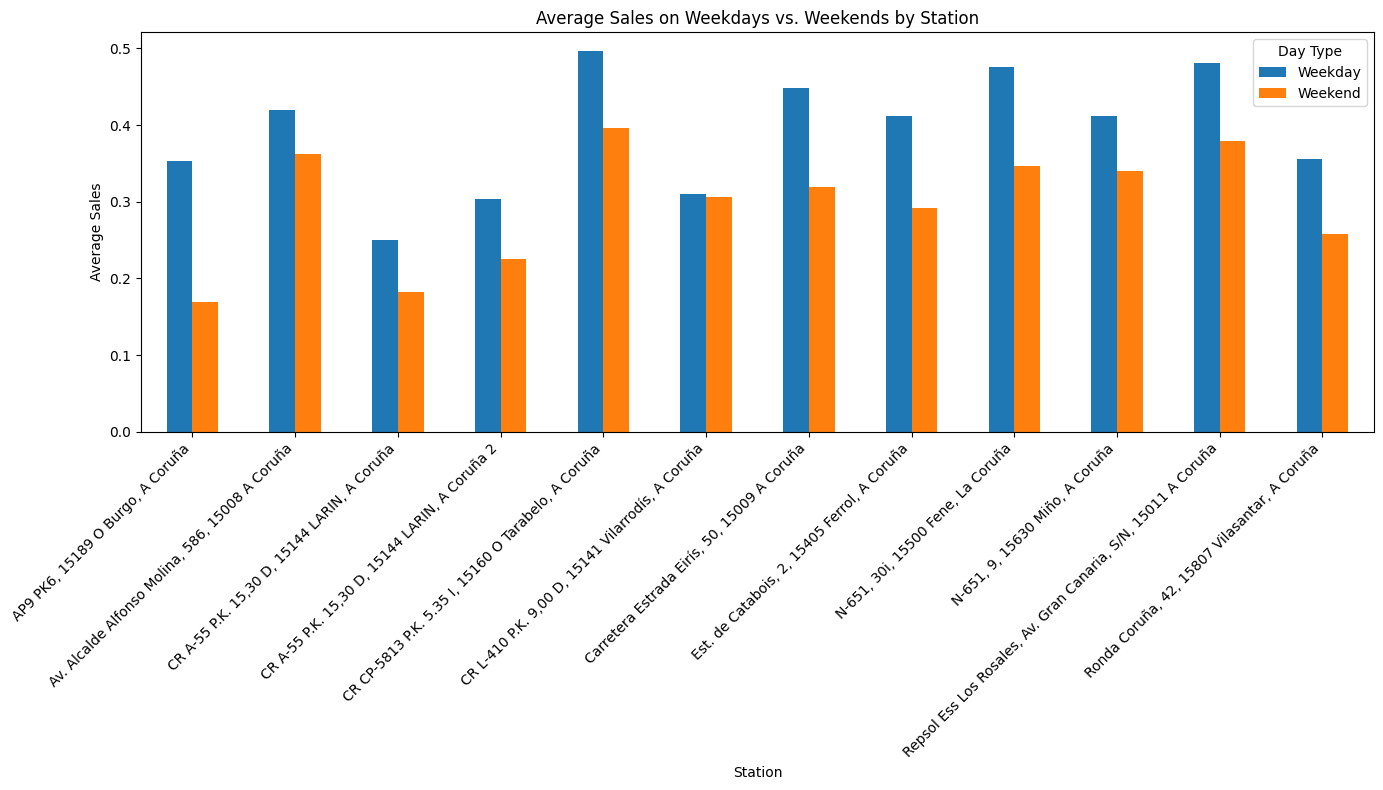

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is already loaded with the provided dataset

# Simplify day type to 'Weekday' and 'Weekend'
df['Day_Type'] = df['Weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Aggregate sales data by station and day type
station_day_sales = df.groupby(['Address', 'Day_Type'])['Sales'].mean().reset_index()

# Rename columns for better readability
station_day_sales.columns = ['Station', 'Day Type', 'Average Sales']

# Pivot the table to make it easier to plot
pivot_table_day = station_day_sales.pivot(index='Station', columns='Day Type', values='Average Sales')

# Plot the average sales for each station on weekdays vs. weekends
pivot_table_day.plot(kind='bar', figsize=(14, 8))
plt.title('Average Sales on Weekdays vs. Weekends by Station')
plt.xlabel('Station')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

### Station with the highest and lowest sales for each weekday

In [56]:
import pandas as pd

def highest_lowest_sales_by_weekday(df):
    # Filter for non-holiday days
    df = df[df['Holiday'] == False]

    # Define the order of weekdays
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Group by Station and Weekday
    weekday_sales = df.groupby(['Address', 'Weekday'])['Sales'].mean().reset_index()

    # Set Weekday as an ordered categorical
    weekday_sales['Weekday'] = pd.Categorical(weekday_sales['Weekday'], categories=weekday_order, ordered=True)
    weekday_sales = weekday_sales.sort_values('Weekday')

    # Find the highest and lowest sales for each weekday
    results = []
    for weekday in weekday_order:
        subset = weekday_sales[weekday_sales['Weekday'] == weekday]
        if not subset.empty:
            max_station = subset.loc[subset['Sales'].idxmax()]
            min_station = subset.loc[subset['Sales'].idxmin()]
            results.append({
                'Weekday': weekday,
                'Max Station': max_station['Address'],
                'Max Sales': max_station['Sales'],
                'Min Station': min_station['Address'],
                'Min Sales': min_station['Sales']
            })

    return pd.DataFrame(results)

# Example usage
sales_results = highest_lowest_sales_by_weekday(df)
sales_results


,Weekday,Max Station,Max Sales,Min Station,Min Sales
0,Monday,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",0.526684,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",0.266400
1,Tuesday,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",0.498222,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",0.253607
2,Wednesday,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",0.495388,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",0.252744
3,Thursday,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",0.498609,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",0.257072
4,Friday,"Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",0.515952,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",0.244912
5,Saturday,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",0.444358,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",0.175232
6,Sunday,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",0.350281,"AP9 PK6, 15189 O Burgo, A Coruña",0.140027


### Station with the highest and lowest sales for each weekday Holiday = TRUE

In [55]:
import pandas as pd

def highest_lowest_sales_on_holidays(df):
    # Filter only holiday data
    holiday_sales = df[df['Holiday'] == True]

    # Group by Station and Weekday
    holiday_sales_grouped = holiday_sales.groupby(['Address', 'Weekday'])['Sales'].mean().reset_index()

    # Define the order of weekdays
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Set Weekday as an ordered categorical
    holiday_sales_grouped['Weekday'] = pd.Categorical(holiday_sales_grouped['Weekday'], categories=weekday_order, ordered=True)
    holiday_sales_grouped = holiday_sales_grouped.sort_values('Weekday')

    # Find the highest and lowest sales for each weekday
    results = []
    for weekday in weekday_order:
        subset = holiday_sales_grouped[holiday_sales_grouped['Weekday'] == weekday]
        if not subset.empty:
            max_station = subset.loc[subset['Sales'].idxmax()]
            min_station = subset.loc[subset['Sales'].idxmin()]
            results.append({
                'Weekday': weekday,
                'Max Station': max_station['Address'],
                'Max Sales': max_station['Sales'],
                'Min Station': min_station['Address'],
                'Min Sales': min_station['Sales']
            })

    return pd.DataFrame(results)

holiday_sales_results = highest_lowest_sales_on_holidays(df)
holiday_sales_results

,Weekday,Max Station,Max Sales,Min Station,Min Sales
0,Monday,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",0.350379,"AP9 PK6, 15189 O Burgo, A Coruña",0.154341
1,Tuesday,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",0.345515,"AP9 PK6, 15189 O Burgo, A Coruña",0.162376
2,Wednesday,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña",0.365514,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",0.167737
3,Thursday,"Repsol Ess Los Rosales, Av. Gran Canaria, S/N,...",0.365611,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",0.141947
4,Friday,"Av. Alcalde Alfonso Molina, 586, 15008 A Coruña",0.333454,"CR A-55 P.K. 15,30 D, 15144 LARIN, A Coruña",0.135104
5,Saturday,"CR CP-5813 P.K. 5.35 I, 15160 O Tarabelo, A Co...",0.371168,"AP9 PK6, 15189 O Burgo, A Coruña",0.149382


### Weather Conditions Impact

In [48]:
df.columns

Index(['Unnamed: 0', 'Date', 'Product', 'Latitude', 'Longitude', 'RetailPrice',
       'Sales Standard', 'Name', 'Month', 'Year', 'Weekday', 'Holiday_y',
       'Type_x', 'WindDirection', 'TimeMaxPressure', 'TimeMinPressure',
       'TimeGust', 'TimeMaxTemp', 'TimeMinTemp', 'Precipitation',
       'MaxPressure', 'MinPressure', 'Gust', 'Sun', 'MaxTemp', 'AvgTemp',
       'MinTemp', 'AvgSpeed', 'Address', 'Type_y', 'Sales', 'Holiday',
       'Day_Type'],
      dtype='object')

         Date  Precipitation  AvgTemp  AvgSpeed Weather_Type
0  2016-01-01            7.0     12.4       5.8   Light Rain
1  2016-01-01            7.0     12.4       5.8   Light Rain
2  2016-01-02            2.2     11.2       4.2       Normal
3  2016-01-02            2.2     11.2       4.2       Normal
4  2016-01-03           12.0     14.0       5.8   Light Rain
  Weather_Type        Sales
0   Heavy Rain   263.608277
1   Light Rain  1337.074260
2       Normal  8020.491611


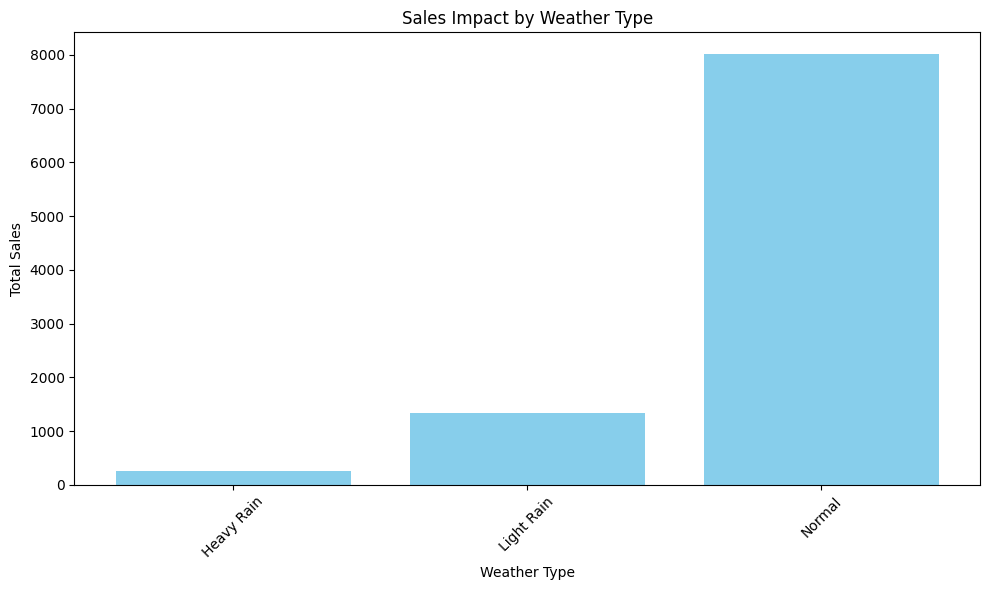

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert relevant columns to numeric
df['Precipitation'] = pd.to_numeric(df['Precipitation'], errors='coerce')
df['AvgTemp'] = pd.to_numeric(df['AvgTemp'], errors='coerce')
df['AvgSpeed'] = pd.to_numeric(df['AvgSpeed'], errors='coerce')

# Categorize weather conditions
def categorize_weather(row):
    if row['Precipitation'] > 20:
        return 'Heavy Rain'
    elif 5 < row['Precipitation'] <= 20:
        return 'Light Rain'
    elif row['AvgTemp'] > 30:
        return 'Hot'
    elif row['AvgTemp'] < 5:
        return 'Cold'
    elif row['AvgSpeed'] > 20:
        return 'Windy'
    else:
        return 'Normal'

df['Weather_Type'] = df.apply(categorize_weather, axis=1)

# Display the first few rows to verify
print(df[['Date', 'Precipitation', 'AvgTemp', 'AvgSpeed', 'Weather_Type']].head())

# Aggregate sales by weather type
weather_sales_impact = df.groupby('Weather_Type')['Sales'].sum().reset_index()

# Display the aggregated sales data by weather type
print(weather_sales_impact)

# Plotting sales impact by weather type
plt.figure(figsize=(10, 6))
plt.bar(weather_sales_impact['Weather_Type'], weather_sales_impact['Sales'], color='skyblue')
plt.xlabel('Weather Type')
plt.ylabel('Total Sales')
plt.title('Sales Impact by Weather Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

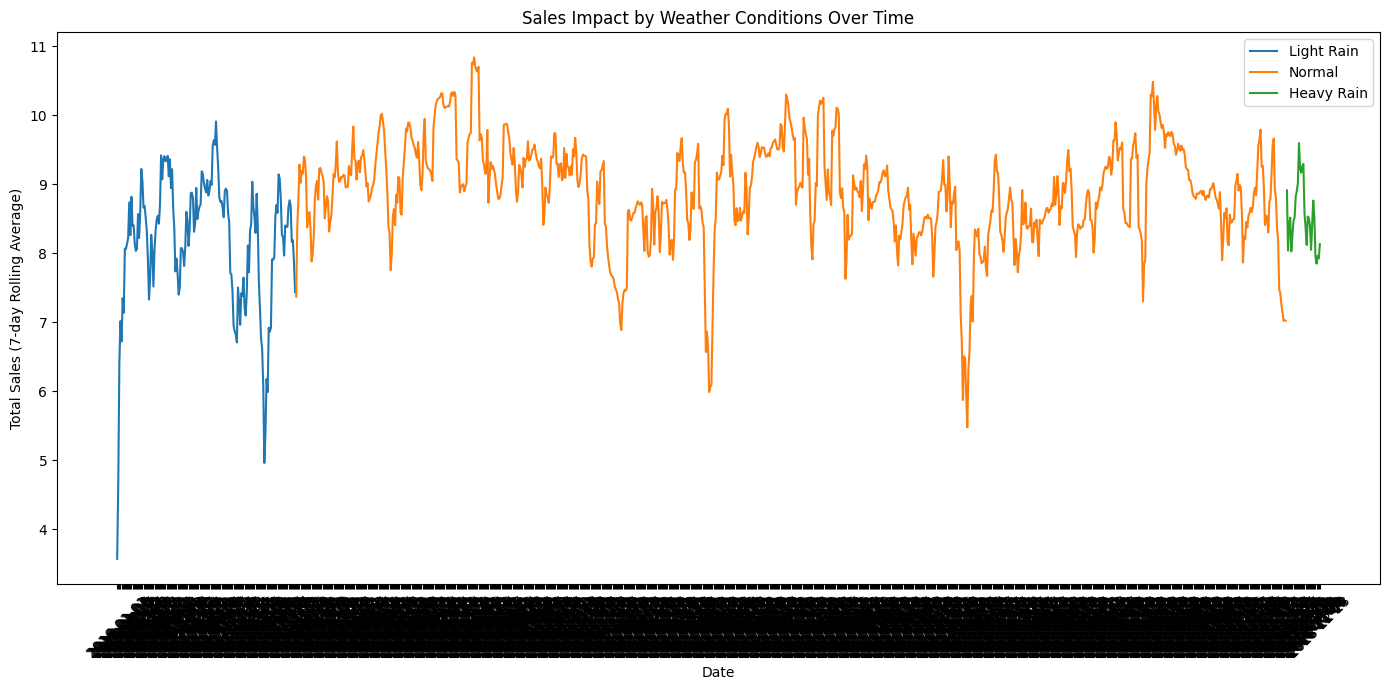

In [50]:
# Aggregate sales by date and weather type
daily_sales = df.groupby(['Date', 'Weather_Type'])['Sales'].sum().reset_index()

# Apply a rolling average to smooth the data
daily_sales['Sales_Rolling'] = daily_sales.groupby('Weather_Type')['Sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Plotting sales with weather conditions over time
plt.figure(figsize=(14, 7))

# Plotting total sales with rolling average
for weather_type in daily_sales['Weather_Type'].unique():
    weather_sales = daily_sales[daily_sales['Weather_Type'] == weather_type]
    plt.plot(weather_sales['Date'], weather_sales['Sales_Rolling'], label=weather_type)

plt.xlabel('Date')
plt.ylabel('Total Sales (7-day Rolling Average)')
plt.title('Sales Impact by Weather Conditions Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
# Plot the weather data (precipitation and temperature)
plt.figure(figsize=(14, 7))
plt.plot(period_data['Date'], period_data['prec'], label='Precipitation')
plt.plot(period_data['Dia'], period_data['tmed'], label='Average Temperature')
plt.title('Weather Data from November 2017 to May 2018')
plt.xlabel('Date')
plt.ylabel('Weather Metrics')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'period_data' is not defined

<Figure size 1400x700 with 0 Axes>